# 05.8 RNN - Uso de Pytorch - Ejemplo Gráficos de Moda (Información Complementaria)


- Obtener una comprensión conceptual de las __redes neuronales multicapa__
- Implementar del algoritmo fundamental de __retropropagación__ para el entrenamiento de redes neuronales desde cero
- __Entrenar una red neuronal multicapa básica__ para la clasificación de imágenes


In [1]:
#conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch

In [3]:
run 05.0_RNN_Utilidades.ipynb

<Figure size 432x288 with 0 Axes>

## Trabajando con datos

PyTorch tiene dos primitivas para trabajar con datos: __torch.utils.data.DataLoader__ y __torch.utils.data.Dataset__. __Dataset__ almacena los ejemplos y sus correspondientes etiquetas, y __DataLoader__ genera un iterable sobre el conjunto de datos.

In [4]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
#trainset = datasets.FashionMNIST('/content/drive/My Drive/Charla Octubre/Data', download=True, train=True, transform=transform)
trainset = datasets.FashionMNIST('data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
#testset = datasets.FashionMNIST('/content/drive/My Drive/Charla Octubre/Data', download=True, train=False, transform=transform)
testset = datasets.FashionMNIST('data', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

**Podemos visualizar el primer elemento de entrenamiento**

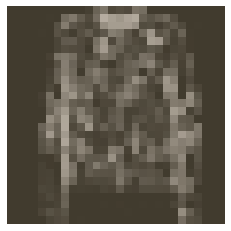

In [5]:
image, label = next(iter(trainloader))
imshow(image[0,:]);

## Construir la Red

Aquí hay que definir la red. Cada imagen es de 28x28, que es un total de 784 píxeles, y hay 10 clases. Se debe incluir al menos una capa oculta. Se recomienda la activación de ReLU para las capas devolviendo los logits o log-softmax de la pasada hacia adelante. 

In [6]:
from torch import nn, optim
import torch.nn.functional as F

In [7]:
# Se define la arquitectura de red
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

# Entrenamiento de la Red

Se crea la red y se entrena. Primero se define [el criterio] (http://pytorch.org/docs/master/nn.html#loss-functions) (por ejemplo `nn.CrossEntropyLoss` o` nn.NLLLoss`) y [el optimizador] (http://pytorch.org/docs/master/optim.html) (normalmente `optim.SGD` u` optim.Adam`).

Luego se escribe el código de entrenamiento. El pase de entrenamiento es un proceso bastante sencillo:

* Hacer un pase directo a través de la red para obtener los logits
* Usar los logits para calcular la pérdida.
* Realizar una pasada hacia atrás a través de la red con `loss.backward ()` para calcular los gradientes
* Dar un paso con el optimizador para actualizar los pesos.

Al ajustar los hiperparámetros (unidades ocultas, tasa de aprendizaje, etc.), debería poder obtener la pérdida de entrenamiento por debajo de 0.4.

In [8]:
# Crear la red, definir criterios y optimizador
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [9]:
# Entrenar la red aquí
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5140684293086595
Training loss: 0.39079499473449775
Training loss: 0.3541501553248622
Training loss: 0.3299258563723137
Training loss: 0.31679446857843574


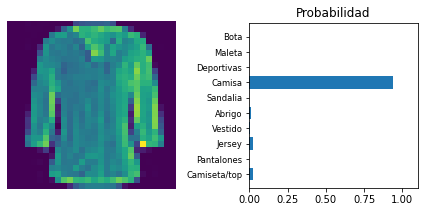

In [10]:
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

#import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img, ps, version='Fashion')